<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_03_ProjThree_Supervised_Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libs

In [ ]:
!pip install -q import_ipynb

In [ ]:
# utils
import os, warnings, sys
import import_ipynb
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy import stats
# colab
from google.colab import drive
# sklearn
from sklearn import (preprocessing,
                     metrics,
                     linear_model,
                     svm,
                     )
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis,
                                           QuadraticDiscriminantAnalysis,
                                           )
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# vis
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
print(sys.version)
print("numpy: ", np.__version__)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
numpy:  1.26.4


## Settings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# mount google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# working directory
working_dir = '/content/drive/MyDrive/Jupyter Notebooks/'
os.chdir(working_dir)

In [ ]:
# load MachineLearningUtils
from MachineLearningUtils import *

importing Jupyter notebook from MachineLearningUtils.ipynb


In [ ]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Dataset

In [ ]:
path = 'Inputs/secom/'

In [ ]:
X = pd.read_csv(path + 'secom.data', header=None)
X.columns = ['f_list']
X.head()

,f_list
0,3030.93 2564 2187.7333 1411.1265 1.3602 100 97...
1,3095.78 2465.14 2230.4222 1463.6606 0.8294 100...
2,2932.61 2559.94 2186.4111 1698.0172 1.5102 100...
3,2988.72 2479.9 2199.0333 909.7926 1.3204 100 1...
4,3032.24 2502.87 2233.3667 1326.52 1.5334 100 1...


In [ ]:
X = X['f_list'].str.split(" ", expand=True)
X = X.astype(float)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,48.2091,0.7578,NaN,2.9570,2.1739,10.0261,17.1202,22.3756,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.6707,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,NaN,NaN,0.0,-0.0039,-0.0198,0.0004,-0.0440,-0.0358,-0.0120,-0.0377,0.0017,6.8043,0.1358,NaN,2.3754,0.9894,1931.6464,0.1874,8407.0299,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,0.0,-0.9353,-0.0158,...,58.1666,3.6822,NaN,3.2029,0.1441,6.6487,12.6788,23.6469,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.4365,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.6292,0.0,26.3970,0.0673,6.6475,3.1310,0.8832,8.8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7910,2.9799,9.5796,0.1096,0.0078,0.0026,7.116,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,70.0,364.3782,9.8783,131.8027,734.7924,1.2992,141.0845,1.0,637.2655,185.7574,0.0,4.486,4.748,2936.0,0.9139,0.9447,4.5873,23.8245,364.5364,10.1685,115.6273,11.3019,16.1755,24.2829,710.5095,0.8694,145.8000,1.0,625.9636,84.7681,140.6972,485.2665,0.0,-0.0078,-0.0326,-0.0052,0.0213,-0.0054,-0.1134,-0.0182,0.0287,7.1041,0.1362

In [ ]:
y = pd.read_csv(path + 'secom_labels.data', header=None)
y.columns = ['time']
y.head()

,time
0,"-1 ""19/07/2008 11:55:00"""
1,"-1 ""19/07/2008 12:32:00"""
2,"1 ""19/07/2008 13:17:00"""
3,"-1 ""19/07/2008 14:43:00"""
4,"-1 ""19/07/2008 15:22:00"""


In [ ]:
get_timestamp = y.iloc[:,0].apply(lambda s: pd.Timestamp(s.split('"')[1]))

In [ ]:
y = y.iloc[:,0].apply(lambda s: int(s.split(" ")[0]))
y.columns = ['label']

In [ ]:
get_timestamp.head()

,time
0,2008-07-19 11:55:00
1,2008-07-19 12:32:00
2,2008-07-19 13:17:00
3,2008-07-19 14:43:00
4,2008-07-19 15:22:00


## Polish Data

In [ ]:
orig_cols = X.columns

In [ ]:
X.index = get_timestamp
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,48.2091,0.7578,NaN,2.9570,2.1739,10.0261,17.1202,22.3756,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.6707,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,NaN,NaN,0.0,-0.0039,-0.0198,0.0004,-0.0440,-0.0358,-0.0120,-0.0377,0.0017,6.8043,0.1358,NaN,2.3754,0.9894,1931.6464,0.1874,8407.0299,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,0.0,-0.9353,-0.0158,...,58.1666,3.6822,NaN,3.2029,0.1441,6.6487,12.6788,23.6469,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,141.4365,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.6292,0.0,26.3970,0.0673,6.6475,3.1310,0.8832,8.8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7910,2.9799,9.5796,0.1096,0.0078,0.0026,7.116,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,70.0,364.3782,9.8783,131.8027,734.7924,1.2992,141.0845,1.0,637

In [ ]:
summarize_columns(X)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,0,float64,6,0.4,1520,3030.9300,3095.7800,2932.6100
1,1,float64,7,0.4,1504,2564.0000,2465.1400,2559.9400
2,2,float64,14,0.9,507,2187.7333,2230.4222,2186.4111
3,3,float64,14,0.9,518,1411.1265,1463.6606,1698.0172
4,4,float64,14,0.9,503,1.3602,0.8294,1.5102
...,...,...,...,...,...,...,...,...
585,585,float64,1,0.1,1502,2.3630,4.4447,3.1745
586,586,float64,1,0.1,322,NaN,0.0096,0.0584
587,587,float64,1,0.1,260,NaN,0.0201,0.0484
588,588,float64,1,0.1,120,NaN,0.0060,0.0148


In [ ]:
X = X.fillna(method='ffill').fillna(method='bfill')

In [ ]:
summarize_columns(X)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,0,float64,0,0.0,1520,3030.9300,3095.7800,2932.6100
1,1,float64,0,0.0,1504,2564.0000,2465.1400,2559.9400
2,2,float64,0,0.0,507,2187.7333,2230.4222,2186.4111
3,3,float64,0,0.0,518,1411.1265,1463.6606,1698.0172
4,4,float64,0,0.0,503,1.3602,0.8294,1.5102
...,...,...,...,...,...,...,...,...
585,585,float64,0,0.0,1502,2.3630,4.4447,3.1745
586,586,float64,0,0.0,322,0.0096,0.0096,0.0584
587,587,float64,0,0.0,260,0.0201,0.0201,0.0484
588,588,float64,0,0.0,120,0.0060,0.0060,0.0148


In [ ]:
y.index = get_timestamp
print("Number of missing values:", y.isna().sum())
y.head()

Number of missing values: 0


,time
time,
2008-07-19 11:55:00,-1
2008-07-19 12:32:00,-1
2008-07-19 13:17:00,1
2008-07-19 14:43:00,-1
2008-07-19 15:22:00,-1


In [ ]:
def flag_outside_95prc_ci(series):
    '''
    Use percent point function (ppf) and q=0.975 for 95% confidence interval (CI)
    '''
    z_critical = stats.norm.ppf(q=0.975)
    SE = np.std(series)/np.sqrt(len(series)) # standard error
    MoE = z_critical * SE # margin of error
    CI = (np.mean(series)-MoE, np.mean(series)+MoE)
    series_flag = series.apply(lambda x: 0 if ((x>=CI[0]) & (x<=CI[1])) else 1)
    return series_flag

In [ ]:
cols_outside_95prc_ci = []
for col in X.columns:
    X['outside_95prc_ci_'+str(col)] = flag_outside_95prc_ci(X[col])
    cols_outside_95prc_ci.append('outside_95prc_ci_' + str(col))
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,outside_95prc_ci_490,outside_95prc_ci_491,outside_95prc_ci_492,outside_95prc_ci_493,outside_95prc_ci_494,outside_95prc_ci_495,outside_95prc_ci_496,outside_95prc_ci_497,outside_95prc_ci_498,outside_95prc_ci_499,outside_95prc_ci_500,outside_95prc_ci_501,outside_95prc_ci_502,outside_95prc_ci_503,outside_95prc_ci_504,outside_95prc_ci_505,outside_95prc_ci_506,outside_95prc_ci_507,outside_95prc_ci_508,outside_95prc_ci_509,outside_95prc_ci_510,outside_95prc_ci_511,outside_95prc_ci_512,outside_95prc_ci_513,outside_95prc_ci_514,outside_95prc_ci_515,outside_95prc_ci_516,outside_95prc_ci_517,outside_95prc_ci_518,outside_95prc_ci_519,outside_95prc_ci_520,outside_95prc_ci_521,outside_95prc_ci_522,outside_95prc_ci_523,outside_95prc_ci_524,outside_95prc_ci_525,outside_95prc_ci_526,outside_95prc_ci_527,outside_95prc_ci_528,outside_95prc_ci_529,outside_95prc_ci_530,outside_95prc_ci_531,outside_95prc_ci_532,outside_95prc_ci_533,outside_95prc_ci_534,outside_95prc_ci_535,outside_95prc_ci_536,outside_95prc_ci_537,outside_95prc_ci_538,outside_95prc_ci_539,outside_95prc_ci_540,outside_95prc_ci_541,outside_95prc_ci_542,outside_95prc_ci_543,outside_95prc_ci_544,outside_95prc_ci_545,outside_95prc_ci_546,outside_95prc_ci_547,outside_95prc_ci_548,outside_95prc_ci_549,outside_95prc_ci_550,outside_95prc_ci_551,outside_95prc_ci_552,outside_95prc_ci_553,outside_95prc_ci_554,outside_95prc_ci_555,outside_95prc_ci_556,outside_95prc_ci_557,outside_95prc_ci_558,outside_95prc_ci_559,outside_95prc_ci_560,outside_95prc_ci_561,outside_95prc_ci_562,outside_95prc_ci_563,outside_95prc_ci_564,outside_95prc_ci_565,outside_95prc_ci_566,outside_95prc_ci_567,outside_95prc_ci_568,outside_95prc_ci_569,outside_95prc_ci_570,outside_95prc_ci_571,outside_95prc_ci_572,outside_95prc_ci_573,outside_95prc_ci_574,outside_95prc_ci_575,outside_95prc_ci_576,outside_95prc_ci_577,outside_95prc_ci_578,outside_95prc_ci_579,outside_95prc_ci_580,outside_95prc_ci_581,outside_95prc_ci_582,outside_95prc_ci_583,outside_95prc_ci_584,outside_95prc_ci_585,outside_95prc_ci_586,outside_95prc_ci_587,outside_95prc_ci_588,outside_95prc_ci_589
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,140.6972,485.2665,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.1107,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1

In [ ]:
X['sum_outside_95prc_ci'] = X[cols_outside_95prc_ci].sum(axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,outside_95prc_ci_491,outside_95prc_ci_492,outside_95prc_ci_493,outside_95prc_ci_494,outside_95prc_ci_495,outside_95prc_ci_496,outside_95prc_ci_497,outside_95prc_ci_498,outside_95prc_ci_499,outside_95prc_ci_500,outside_95prc_ci_501,outside_95prc_ci_502,outside_95prc_ci_503,outside_95prc_ci_504,outside_95prc_ci_505,outside_95prc_ci_506,outside_95prc_ci_507,outside_95prc_ci_508,outside_95prc_ci_509,outside_95prc_ci_510,outside_95prc_ci_511,outside_95prc_ci_512,outside_95prc_ci_513,outside_95prc_ci_514,outside_95prc_ci_515,outside_95prc_ci_516,outside_95prc_ci_517,outside_95prc_ci_518,outside_95prc_ci_519,outside_95prc_ci_520,outside_95prc_ci_521,outside_95prc_ci_522,outside_95prc_ci_523,outside_95prc_ci_524,outside_95prc_ci_525,outside_95prc_ci_526,outside_95prc_ci_527,outside_95prc_ci_528,outside_95prc_ci_529,outside_95prc_ci_530,outside_95prc_ci_531,outside_95prc_ci_532,outside_95prc_ci_533,outside_95prc_ci_534,outside_95prc_ci_535,outside_95prc_ci_536,outside_95prc_ci_537,outside_95prc_ci_538,outside_95prc_ci_539,outside_95prc_ci_540,outside_95prc_ci_541,outside_95prc_ci_542,outside_95prc_ci_543,outside_95prc_ci_544,outside_95prc_ci_545,outside_95prc_ci_546,outside_95prc_ci_547,outside_95prc_ci_548,outside_95prc_ci_549,outside_95prc_ci_550,outside_95prc_ci_551,outside_95prc_ci_552,outside_95prc_ci_553,outside_95prc_ci_554,outside_95prc_ci_555,outside_95prc_ci_556,outside_95prc_ci_557,outside_95prc_ci_558,outside_95prc_ci_559,outside_95prc_ci_560,outside_95prc_ci_561,outside_95prc_ci_562,outside_95prc_ci_563,outside_95prc_ci_564,outside_95prc_ci_565,outside_95prc_ci_566,outside_95prc_ci_567,outside_95prc_ci_568,outside_95prc_ci_569,outside_95prc_ci_570,outside_95prc_ci_571,outside_95prc_ci_572,outside_95prc_ci_573,outside_95prc_ci_574,outside_95prc_ci_575,outside_95prc_ci_576,outside_95prc_ci_577,outside_95prc_ci_578,outside_95prc_ci_579,outside_95prc_ci_580,outside_95prc_ci_581,outside_95prc_ci_582,outside_95prc_ci_583,outside_95prc_ci_584,outside_95prc_ci_585,outside_95prc_ci_586,outside_95prc_ci_587,outside_95prc_ci_588,outside_95prc_ci_589,sum_outside_95prc_ci
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,140.6972,485.2665,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.1107,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,429
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205

In [ ]:
for col in X.columns:
    if(col in orig_cols):
        X['cumsum_' + str(col)] = X[col].cumsum()

In [ ]:
for col in X.columns:
    if(col in orig_cols):
        X['rol_mean_7day_'+str(col)] =  X[col].rolling(7, center=True).mean()
        X['rol_std_7day_'+str(col)] =  X[col].rolling(7, center=True).std()
        X['rol_mean_1day_'+str(col)] =  X[col].rolling(1, center=True).mean()

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,rol_mean_1day_556,rol_mean_7day_557,rol_std_7day_557,rol_mean_1day_557,rol_mean_7day_558,rol_std_7day_558,rol_mean_1day_558,rol_mean_7day_559,rol_std_7day_559,rol_mean_1day_559,rol_mean_7day_560,rol_std_7day_560,rol_mean_1day_560,rol_mean_7day_561,rol_std_7day_561,rol_mean_1day_561,rol_mean_7day_562,rol_std_7day_562,rol_mean_1day_562,rol_mean_7day_563,rol_std_7day_563,rol_mean_1day_563,rol_mean_7day_564,rol_std_7day_564,rol_mean_1day_564,rol_mean_7day_565,rol_std_7day_565,rol_mean_1day_565,rol_mean_7day_566,rol_std_7day_566,rol_mean_1day_566,rol_mean_7day_567,rol_std_7day_567,rol_mean_1day_567,rol_mean_7day_568,rol_std_7day_568,rol_mean_1day_568,rol_mean_7day_569,rol_std_7day_569,rol_mean_1day_569,rol_mean_7day_570,rol_std_7day_570,rol_mean_1day_570,rol_mean_7day_571,rol_std_7day_571,rol_mean_1day_571,rol_mean_7day_572,rol_std_7day_572,rol_mean_1day_572,rol_mean_7day_573,rol_std_7day_573,rol_mean_1day_573,rol_mean_7day_574,rol_std_7day_574,rol_mean_1day_574,rol_mean_7day_575,rol_std_7day_575,rol_mean_1day_575,rol_mean_7day_576,rol_std_7day_576,rol_mean_1day_576,rol_mean_7day_577,rol_std_7day_577,rol_mean_1day_577,rol_mean_7day_578,rol_std_7day_578,rol_mean_1day_578,rol_mean_7day_579,rol_std_7day_579,rol_mean_1day_579,rol_mean_7day_580,rol_std_7day_580,rol_mean_1day_580,rol_mean_7day_581,rol_std_7day_581,rol_mean_1day_581,rol_mean_7day_582,rol_std_7day_582,rol_mean_1day_582,rol_mean_7day_583,rol_std_7day_583,rol_mean_1day_583,rol_mean_7day_584,rol_std_7day_584,rol_mean_1day_584,rol_mean_7day_585,rol_std_7day_585,rol_mean_1day_585,rol_mean_7day_586,rol_std_7day_586,rol_mean_1day_586,rol_mean_7day_587,rol_std_7day_587,rol_mean_1day_587,rol_mean_7day_588,rol_std_7day_588,rol_mean_1day_588,rol_mean_7day_589,rol_std_7day_589,rol_mean_1day_589
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,140.6972,485.2665,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.1107,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,3.2687,NaN,NaN,1.0297,NaN,NaN,1.0344,NaN,NaN,0.4385,NaN,NaN,0.1039,NaN,NaN,42.3877,NaN,NaN,267.064,NaN,NaN,0.9032,NaN,NaN,1.10,NaN,NaN,0.6219,NaN,NaN,0.4122,NaN,NaN,0.2562,NaN,NaN,0.4119,NaN,NaN,68.8489,NaN,NaN,533.8500,NaN,NaN,2.1113,NaN,NaN,8.95,NaN,NaN,0.3157,NaN,NaN,3.0624,NaN,NaN,0.1026,NaN,NaN,1.6765,NaN,NaN,14.9509,NaN,NaN,0.0096,NaN,NaN,0.0201,NaN,NaN,0.0060,NaN,NaN,208.2045,NaN,NaN,0.5005,NaN,NaN,0.0118,NaN,NaN,0.0035,NaN,NaN,2.3630,NaN,NaN,0.0096,NaN,NaN,0.0201,NaN,NaN,0.0060,NaN,NaN,208.2045
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.

In [ ]:
X['month'] = X.index.month
X['weekday'] = X.index.weekday
X['hour'] = X.index.hour

In [ ]:
time_of_day = ['late_night', 'early_morning', 'morning', 'noon', 'evening', 'night']
X['work_shift'] = pd.cut(X['hour'],
                         bins=[0, 4, 8, 12, 16, 20, 24],
                         labels=time_of_day,
                         include_lowest=True)

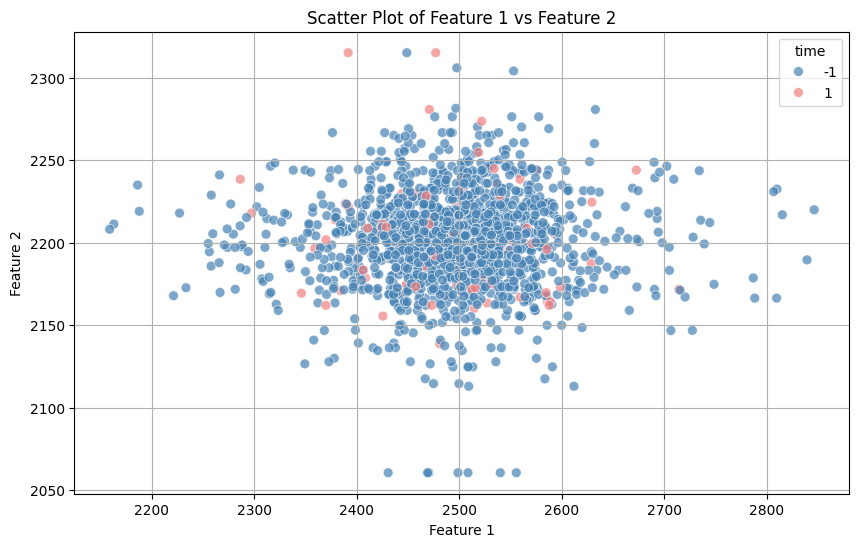

In [ ]:
cmap = {-1: 'steelblue', 1: 'lightcoral'}
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=y, palette=cmap, s=50, alpha=0.7)
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

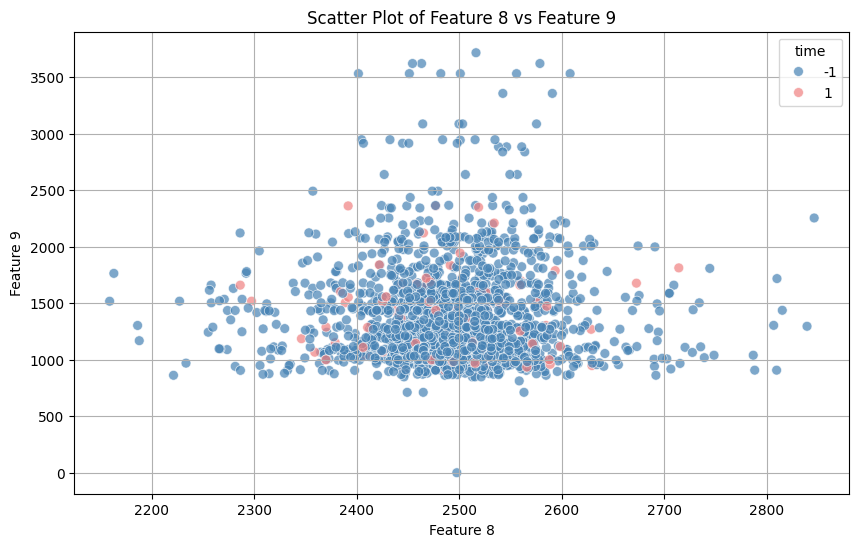

In [ ]:
cmap = {-1: 'steelblue', 1: 'lightcoral'}
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 3], hue=y, palette=cmap, s=50, alpha=0.7)
plt.title('Scatter Plot of Feature 8 vs Feature 9')
plt.xlabel('Feature 8')
plt.ylabel('Feature 9')
plt.grid(True)
plt.show()

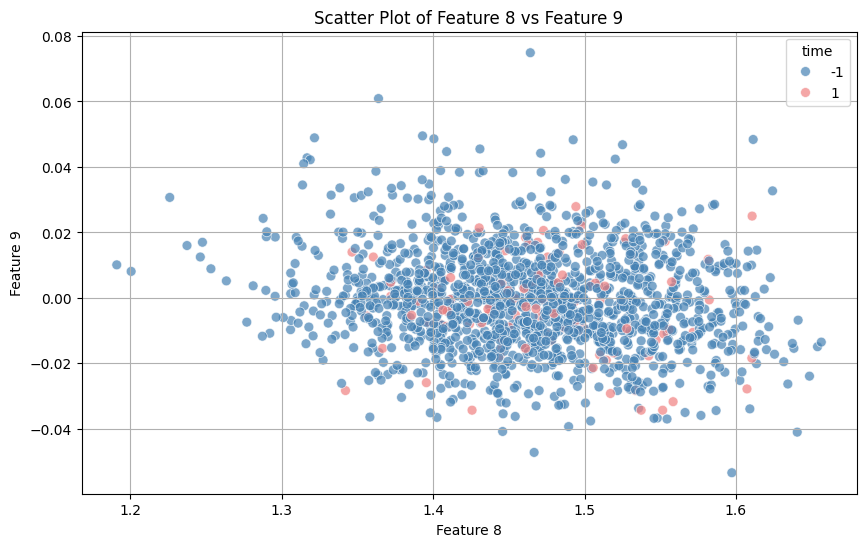

In [ ]:
cmap = {-1: 'steelblue', 1: 'lightcoral'}
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 8], y=X.iloc[:, 9], hue=y, palette=cmap, s=50, alpha=0.7)
plt.title('Scatter Plot of Feature 8 vs Feature 9')
plt.xlabel('Feature 8')
plt.ylabel('Feature 9')
plt.grid(True)
plt.show()

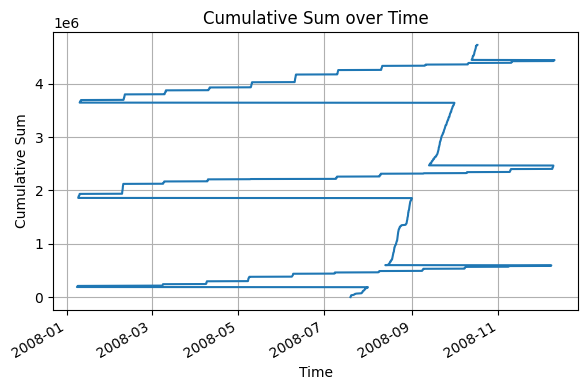

In [ ]:
plt.figure(figsize=(6, 4))
X.iloc[:, 0].cumsum().plot()
plt.title('Cumulative Sum over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.tight_layout()
plt.show()

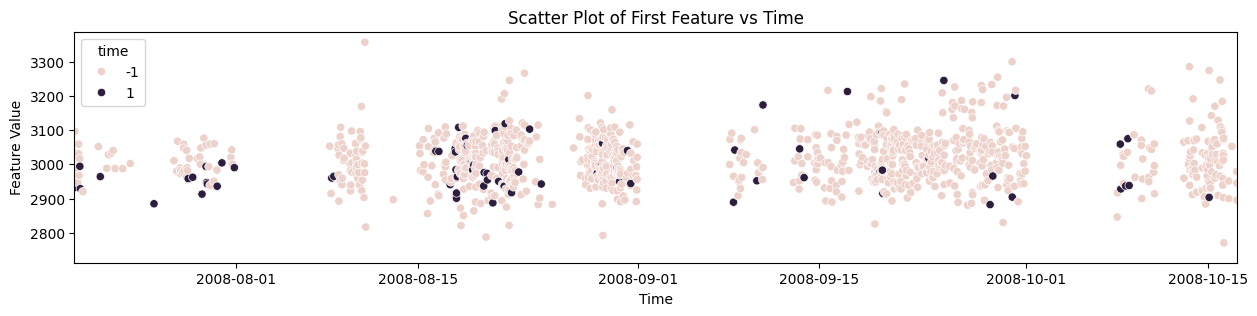

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.scatterplot(data=X, x=X.index, y=X.iloc[:,0], hue=y, ax=ax)
ax.set_xlim(X.index[0], X.index[-1])
ax.set_title('Scatter Plot of First Feature vs Time')
ax.set_xlabel('Time')
ax.set_ylabel('Feature Value')
plt.show()

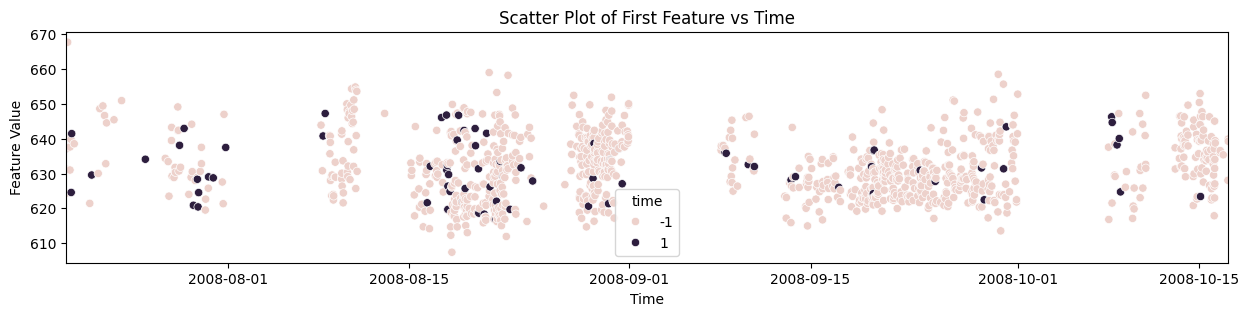

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.scatterplot(data=X, x=X.index, y=X.iloc[:,50], hue=y, ax=ax)
ax.set_xlim(X.index[0], X.index[-1])
ax.set_title('Scatter Plot of First Feature vs Time')
ax.set_xlabel('Time')
ax.set_ylabel('Feature Value')
plt.show()

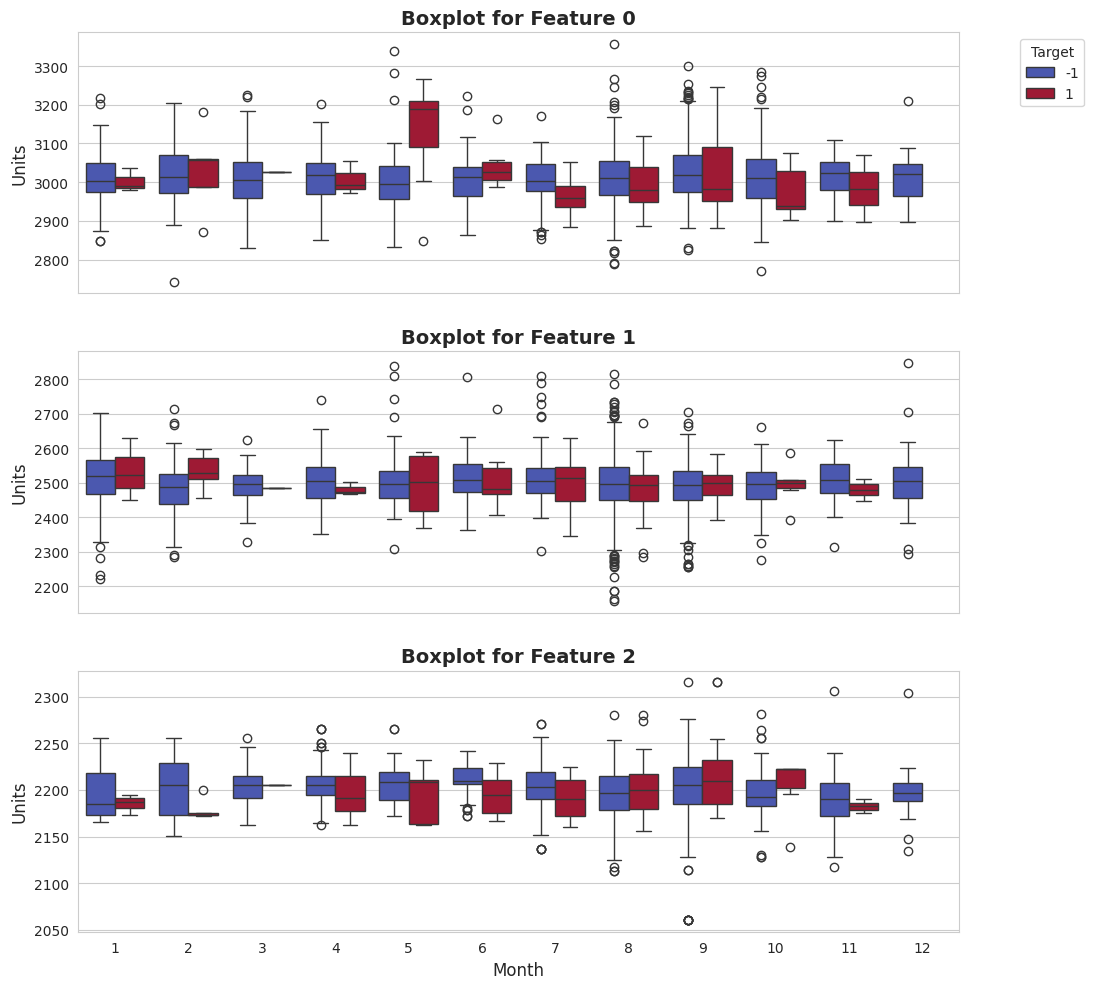

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
palette = sns.color_palette("coolwarm", as_cmap=True)
for name, ax in zip([0, 1, 2], axes):
    sns.boxplot(data=X, x='month', y=name, ax=ax, hue=y, palette=palette)
    ax.set_ylabel('Units', fontsize=12)
    ax.set_title(f"Boxplot for Feature {name}", fontsize=14, weight='bold')
    if ax != axes[-1]:
        ax.set_xlabel('')
    if name == 0:
        ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Target')
    else:
        ax.get_legend().remove()
axes[-1].set_xlabel('Month', fontsize=12)
plt.tight_layout(h_pad=2.5, w_pad=2)
plt.show()

In [ ]:
X.isna().sum().sort_values(ascending=False).head()

,0
rol_std_7day_0,6
rol_mean_7day_222,6
rol_mean_7day_234,6
rol_std_7day_234,6
rol_mean_7day_235,6


In [ ]:
dummify_cols =['month', 'weekday', 'hour', 'work_shift']
X[['month', 'weekday', 'hour']] = X[['month', 'weekday', 'hour']].astype(str)
X = pd.concat([X.drop(dummify_cols, axis=1) , pd.get_dummies(X[dummify_cols])], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,rol_mean_7day_573,rol_std_7day_573,rol_mean_1day_573,rol_mean_7day_574,rol_std_7day_574,rol_mean_1day_574,rol_mean_7day_575,rol_std_7day_575,rol_mean_1day_575,rol_mean_7day_576,rol_std_7day_576,rol_mean_1day_576,rol_mean_7day_577,rol_std_7day_577,rol_mean_1day_577,rol_mean_7day_578,rol_std_7day_578,rol_mean_1day_578,rol_mean_7day_579,rol_std_7day_579,rol_mean_1day_579,rol_mean_7day_580,rol_std_7day_580,rol_mean_1day_580,rol_mean_7day_581,rol_std_7day_581,rol_mean_1day_581,rol_mean_7day_582,rol_std_7day_582,rol_mean_1day_582,rol_mean_7day_583,rol_std_7day_583,rol_mean_1day_583,rol_mean_7day_584,rol_std_7day_584,rol_mean_1day_584,rol_mean_7day_585,rol_std_7day_585,rol_mean_1day_585,rol_mean_7day_586,rol_std_7day_586,rol_mean_1day_586,rol_mean_7day_587,rol_std_7day_587,rol_mean_1day_587,rol_mean_7day_588,rol_std_7day_588,rol_mean_1day_588,rol_mean_7day_589,rol_std_7day_589,rol_mean_1day_589,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,work_shift_late_night,work_shift_early_morning,work_shift_morning,work_shift_noon,work_shift_evening,work_shift_night
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,140.6972,485.2665,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.1107,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,NaN,NaN,0.3157,NaN,NaN,3.0624,NaN,NaN,0.1026,NaN,NaN,1.6765,NaN,NaN,14.9509,NaN,NaN,0.0096,NaN,NaN,0.0201,NaN,NaN,0.0060,NaN,NaN,208.2045,NaN,NaN,0.5005,NaN,NaN,0.0118,NaN,NaN,0.0035,NaN,NaN,2.3630,NaN,NaN,0.0096,NaN,NaN,0.0201,NaN,NaN,0.0060,NaN,NaN,208.2045,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,140.6972,485.2665,0.0,-0.0039,-0.0198,0.0004,-0.0440,-0.0358,-0.0120,-0.0377,0.0017,6.8043,0.1358,0.1107,2.3754,0.9894,1931.6464,0.1874,8407.0299,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,0.0,-0.9353,-0.0158,...,NaN,NaN,0.2653,

In [ ]:
X = X[X.columns[(X.var(axis=0)>0).values]]

In [ ]:
corr_matrix = X.corr()

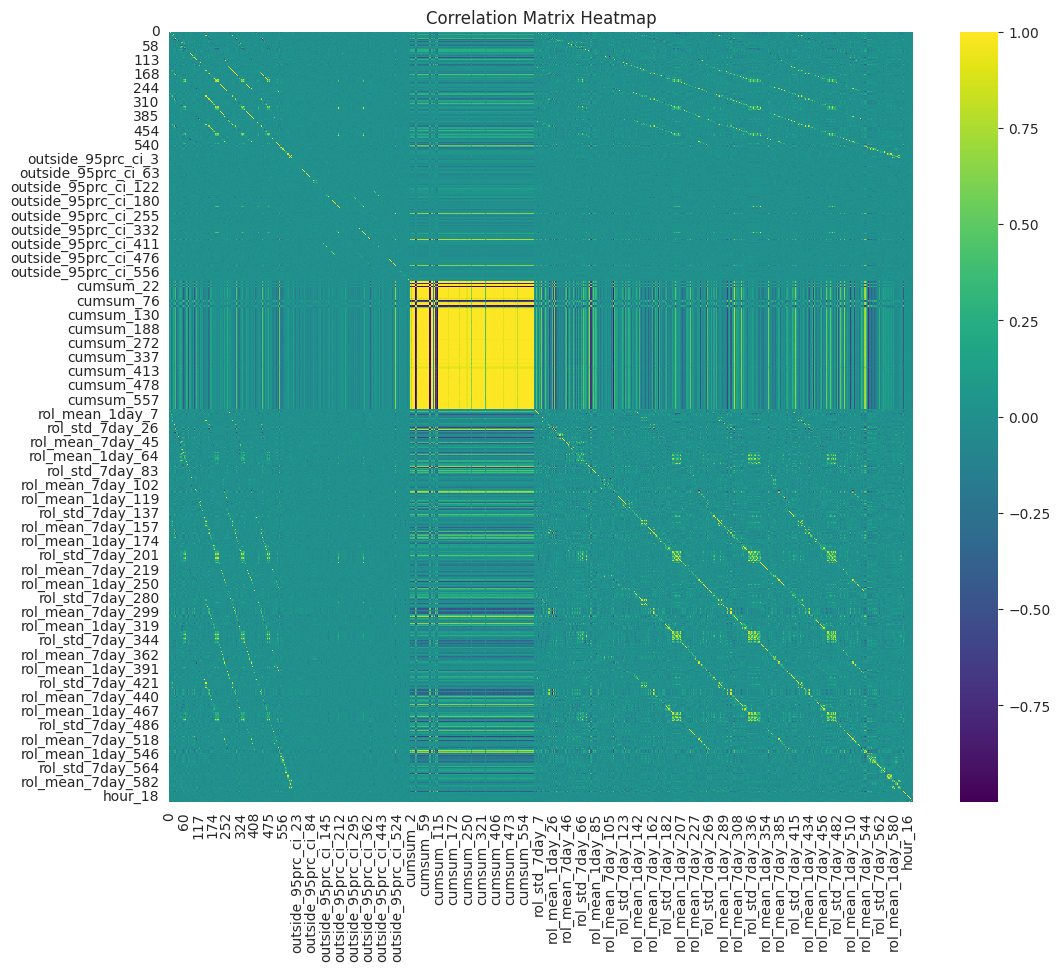

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='viridis', annot=False, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
r_squared_threshold = 0.70 # R² threshold
r_squared = corr_matrix ** 2
mask = np.triu(np.ones(r_squared.shape), k=1).astype(bool) # mask the upper triangle (including diagonal) to avoid redundancy
r_squared_triu = r_squared.where(mask)
drop_cols = [col for col in r_squared_triu.columns if any(r_squared_triu[col] > r_squared_threshold)]
X = X.drop(drop_cols, axis=1)
print(f"Columns dropped due to high correlation: {drop_cols}")

Columns dropped due to high correlation: [27, 30, 36, 50, 54, 60, 65, 70, 96, 98, 101, 104, 105, 106, 123, 124, 127, 140, 147, 148, 152, 154, 164, 165, 174, 196, 197, 199, 203, 204, 205, 206, 207, 209, 244, 245, 246, 249, 252, 270, 271, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 316, 317, 318, 319, 320, 321, 323, 324, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 365, 366, 376, 377, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 405, 406, 407, 408, 409, 410, 411, 412, 413, 415, 416, 417, 420, 421, 424, 425, 426, 427, 428, 429, 430, 431, 434, 435, 436, 437, 440, 441, 442, 443, 444, 445, 446, 447, 448, 452, 453, 454, 455, 456, 457, 459, 467, 469, 470, 471, 473, 475, 477, 478, 479, 490, 491, 492, 493, 494, 495

In [ ]:
X = X.fillna(0)

In [ ]:
summarize_columns(X)

,col_name,dtypes,missing,missing_percent,uniques,first_value,second_value,third_value
0,0,float64,0,0.0,1520,3030.93,3095.78,2932.61
1,1,float64,0,0.0,1504,2564.0,2465.14,2559.94
2,2,float64,0,0.0,507,2187.7333,2230.4222,2186.4111
3,3,float64,0,0.0,518,1411.1265,1463.6606,1698.0172
4,4,float64,0,0.0,503,1.3602,0.8294,1.5102
...,...,...,...,...,...,...,...,...
1138,work_shift_early_morning,bool,0,0.0,2,False,False,False
1139,work_shift_morning,bool,0,0.0,2,True,True,False
1140,work_shift_noon,bool,0,0.0,2,False,False,True
1141,work_shift_evening,bool,0,0.0,2,False,False,False


In [ ]:
display_df(X)

Dataframe:  
num_rows = 1,567 
num_cols = 1,143


,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,46,47,48,51,53,55,56,57,58,59,61,62,63,64,66,67,68,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,99,100,102,103,107,108,109,110,111,112,113,114,115,116,117,118,119,120,...,rol_std_7day_499,rol_mean_7day_500,rol_std_7day_500,rol_mean_7day_510,rol_std_7day_510,rol_mean_7day_511,rol_std_7day_511,rol_mean_7day_521,rol_mean_7day_542,rol_mean_7day_543,rol_std_7day_543,rol_mean_7day_544,rol_mean_7day_546,rol_std_7day_546,rol_mean_7day_547,rol_std_7day_547,rol_mean_7day_548,rol_std_7day_548,rol_mean_7day_549,rol_std_7day_549,rol_mean_7day_550,rol_std_7day_550,rol_mean_7day_551,rol_std_7day_555,rol_mean_7day_558,rol_std_7day_558,rol_mean_7day_559,rol_std_7day_559,rol_std_7day_560,rol_mean_7day_562,rol_std_7day_562,rol_mean_7day_563,rol_std_7day_563,rol_mean_7day_564,rol_std_7day_564,rol_mean_7day_565,rol_std_7day_565,rol_mean_7day_570,rol_mean_7day_571,rol_std_7day_571,rol_mean_7day_572,rol_mean_7day_573,rol_mean_7day_578,rol_std_7day_578,rol_mean_7day_579,rol_std_7day_579,rol_mean_7day_581,rol_std_7day_581,rol_mean_7day_582,rol_std_7day_582,rol_mean_7day_583,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_2,hour_20,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,work_shift_late_night,work_shift_early_morning,work_shift_morning,work_shift_noon,work_shift_evening,work_shift_night
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,64.2333,2.0222,3.5191,83.3971,9.5126,50.6170,64.2588,66.3141,86.9555,117.5132,61.29,4.515,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,218.3174,4.592,2834.0,0.9317,0.9484,4.7057,-1.7264,10.6231,108.6427,16.1445,21.7264,693.7724,0.9226,148.6009,84.0793,140.6972,485.2665,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.1107,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.0251,0.0002,0.1350,-0.0042,-0.2468,0.3196,0.9768,105.7455,230.7648,0.4684,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,68.4222,2.2667,3.4171,84.9052,9.7997,50.6596,64.2828,64.9193,87.5241,118.1188,78.25,2.773,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,205.1695,4.590,2853.0,0.9324,0.9479,4.6820,0.8073,10.3092,113.9800,10.9036,19.1927,697.1964,1.1598,154.3709,82.3494,140.6972,485.2665,0.0,-0.0039,-0.0198,0.0004,-0.0440,-0.0358,-0.0120,-0.0377,0.0017,6.8043,0.1358,0.1107,2.3

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1567 entries, 2008-07-19 11:55:00 to 2008-10-17 06:07:00
Columns: 1143 entries, 0 to work_shift_night
dtypes: bool(49), float64(676), int64(418)
memory usage: 13.2 MB


In [ ]:
y.value_counts()

,count
time,
-1,1463
1,104


## Model Imbalanced Data

In [ ]:
data = pd.concat([X, y], axis=1)
print(data.shape)

(1567, 1144)


In [ ]:
major_data = data[data['time'] == -1]
minor_data = data[data['time'] == 1]

print(major_data.shape, minor_data.shape)

(1463, 1144) (104, 1144)


In [ ]:
minor_data_upsampled = resample(minor_data,
                                replace=True,
                                n_samples=major_data.shape[0],
                                random_state=0)

print(minor_data_upsampled.shape)

(1463, 1144)


In [ ]:
upsampled_data = pd.concat([major_data, minor_data_upsampled])
print(upsampled_data.shape)

(2926, 1144)


In [ ]:
X = upsampled_data.drop('time', axis=1)
y = upsampled_data['time']

In [ ]:
y.value_counts()

,count
time,
-1,1463
1,1463


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=True,
                                                    stratify=y,
                                                    test_size=0.3)

In [ ]:
def data_prep_pipeline(x_train, x_test):
    x_train.columns = x_train.columns.astype(str)
    x_test.columns = x_test.columns.astype(str)
    ord_cols = [col for col in x_train.columns if ((x_train[col].unique().sum()==1) & (x_train[col].nunique()==2))]
    reg_cols = x_train.columns[~x_train.columns.isin(ord_cols)]

    reg_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    ord_transformer = Pipeline(steps=[('passthrough', 'passthrough')])

    preprocessor = ColumnTransformer(
        transformers=[
            ('reg', reg_transformer, reg_cols),
            ('ord', ord_transformer, ord_cols)
        ])

    x_train_prep = preprocessor.fit_transform(x_train)
    x_test_prep = preprocessor.transform(x_test)


    return x_train_prep, x_test_prep

x_train, x_test = data_prep_pipeline(x_train, x_test)

In [ ]:
def fit_predict(clf):
    clf.fit(x_train, y_train)
    print(clf)
    y_pred = clf.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print('accuracy score: ', acc)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.show()
    print(cm)
    return acc, cm

model_list = [
    (linear_model.LogisticRegression(max_iter=int(1e3), penalty='elasticnet', solver='saga', l1_ratio=0.45), 'Logistic Regression'),
    (linear_model.LogisticRegressionCV(cv=3, max_iter=int(5e3),penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.45, 0.75], random_state=0), 'Logistic Regression CV'),
    (linear_model.RidgeClassifier(random_state=0), 'Ridge Classifier'),
    (linear_model.RidgeClassifierCV(alphas=[1e-3, 1e-2, .1, .4, .75, 1, 10]), 'Ridge Classifier CV'),
    (linear_model.SGDClassifier(random_state=0), 'SGD Classifier'),
    (linear_model.Perceptron(random_state=0), 'Perceptron'),
    (svm.LinearSVC(random_state=0), 'Linear SVC'),
    (LinearDiscriminantAnalysis(), 'LDA'),
    (QuadraticDiscriminantAnalysis(reg_param=0.5), 'QDA'),
    (linear_model.PassiveAggressiveClassifier(C=0.5, random_state=0), 'Passive Aggressive Classifier'),
    (RandomForestClassifier(random_state=0), 'Random Forest Classifier')
]

results = []
for clf, name in model_list:
  print('_'*50)
  print(name)
  results.append((fit_predict(clf), name))

__________________________________________________
Logistic Regression
LogisticRegression(l1_ratio=0.45, max_iter=1000, penalty='elasticnet',
                   solver='saga')
accuracy score:  0.9464692482915718
[[392  47]
 [  0 439]]
__________________________________________________
Logistic Regression CV
LogisticRegressionCV(cv=3, l1_ratios=[0.25, 0.45, 0.75], max_iter=5000,
                     penalty='elasticnet', random_state=0, solver='saga')
accuracy score:  0.9464692482915718
[[392  47]
 [  0 439]]
__________________________________________________
Ridge Classifier
RidgeClassifier(random_state=0)
accuracy score:  0.8997722095671982
[[351  88]
 [  0 439]]
__________________________________________________
Ridge Classifier CV
RidgeClassifierCV(alphas=[0.001, 0.01, 0.1, 0.4, 0.75, 1, 10])
accuracy score:  0.9305239179954442
[[378  61]
 [  0 439]]
__________________________________________________
SGD Classifier
SGDClassifier(random_state=0)
accuracy score:  0.9749430523917996
[[